# Edge detection

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

In [52]:
def display_img(img):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,'gray')

In [53]:
edges = cv2.Canny(face,threshold1=0,threshold2=255)

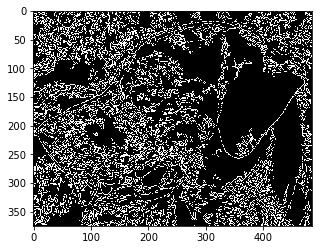

In [54]:
display_img(edges)

In [55]:
# Fist find the median pixel value
median_val = np.median(face)

In [56]:
median_val

64.0

In [57]:
# Set the lower threshold to zero or 70% of the median value, which ever is greater 
lower = int(max(0,0.7*median_val))
#Upper threshold to either 130% of the median or the max 255, which ever is smaller
upper = int(min(255,1.3*median_val))

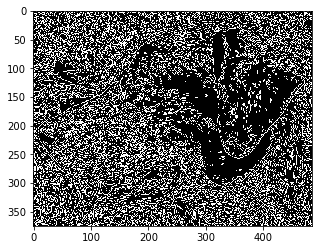

In [58]:
edges = cv2.Canny(face,threshold1=lower,threshold2=upper)
display_img(edges)

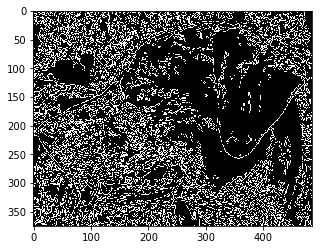

In [59]:
edges = cv2.Canny(face,threshold1=lower,threshold2=upper+100)
display_img(edges)

In [60]:
blurr_img = cv2.blur(face,ksize=(3,3))

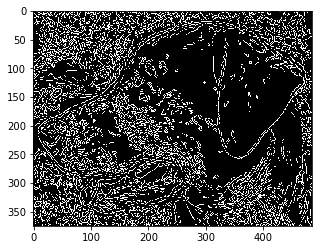

In [61]:
edges = cv2.Canny(blurr_img,threshold1=lower,threshold2=upper)
display_img(edges)

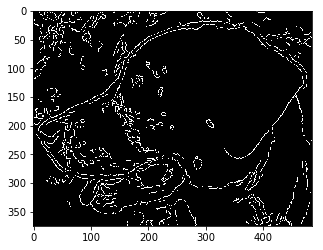

In [69]:
blurr_img = cv2.blur(face,ksize=(6,6))
edges = cv2.Canny(blurr_img,threshold1=lower,threshold2=upper+20)
display_img(edges)

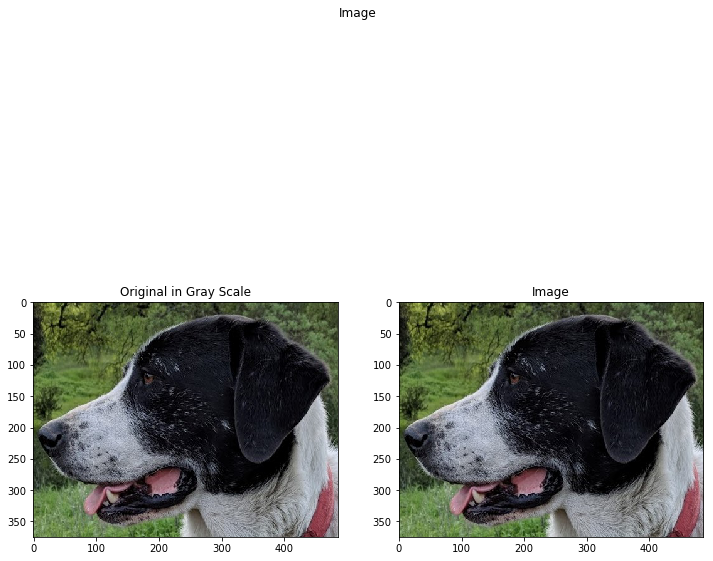

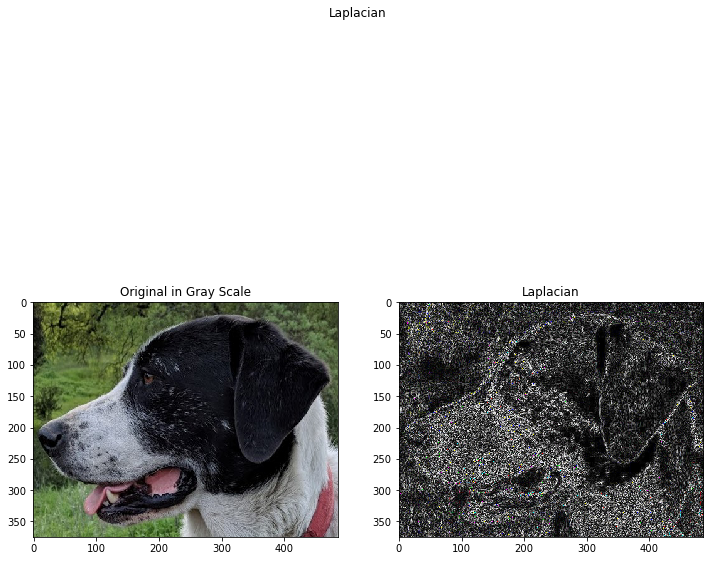

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


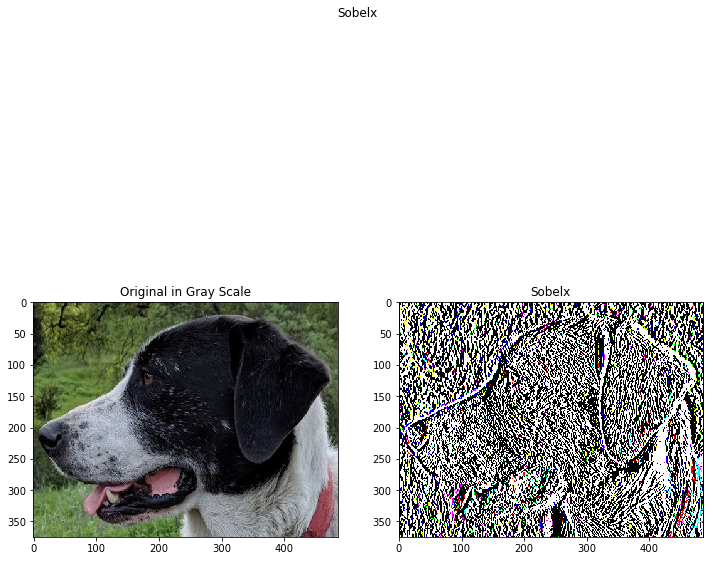

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


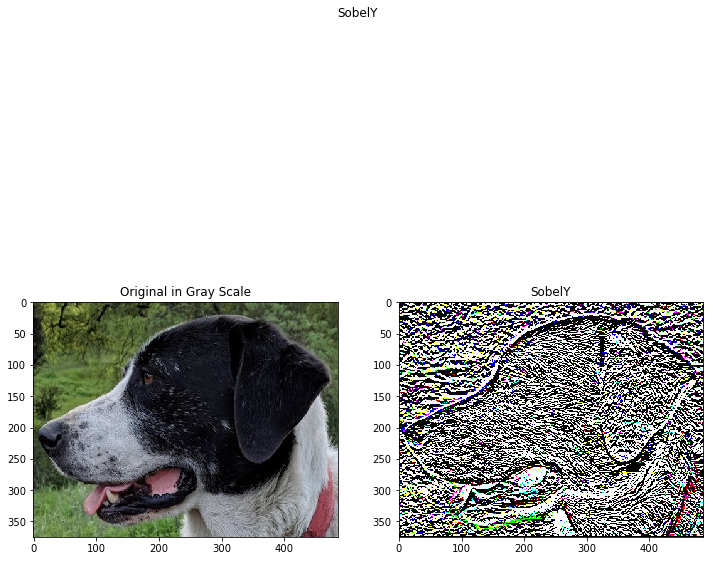

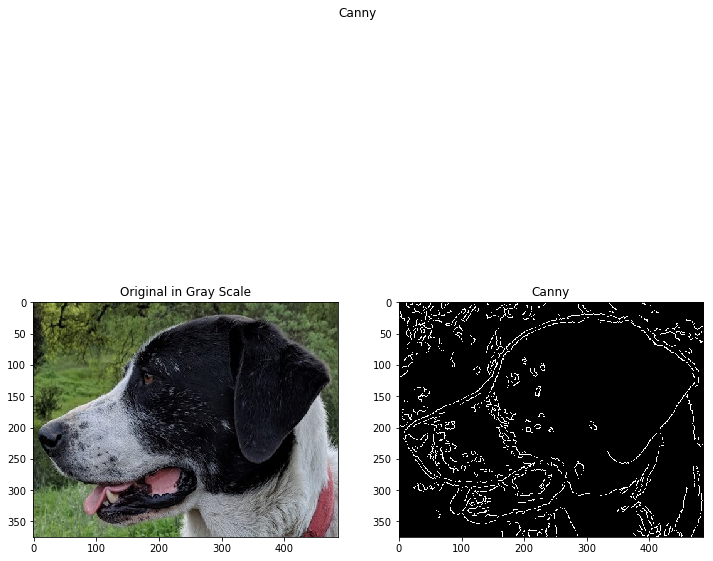

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


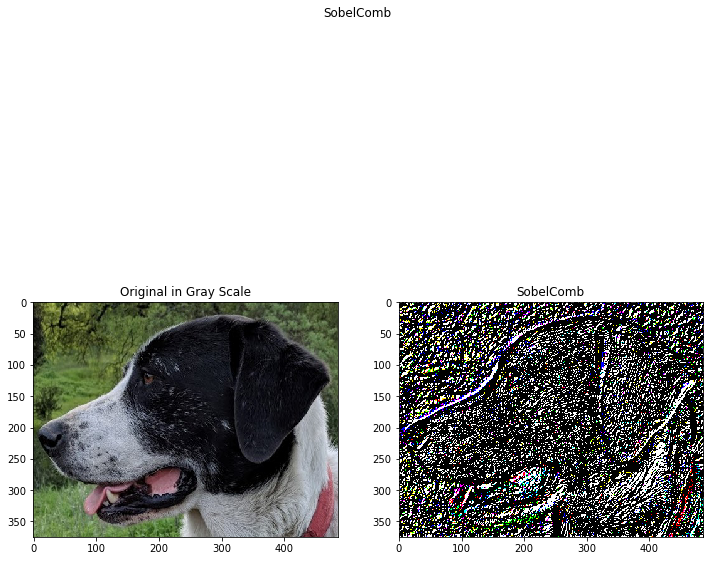

In [63]:
face = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

#Applying laplacian filter to the image
img_lap = cv2.Laplacian(face,cv2.CV_64F,ksize=3)
img = np.uint8(np.absolute(img_lap))

# apply sobel filter to detec edges 
sobelx = cv2.Sobel(face,cv2.CV_64F,1,0)
sobely = cv2.Sobel(face,cv2.CV_64F,0,1)

#applying canny filter, before that blurr the image
blurr_img = cv2.blur(face,ksize=(6,6))
# Set the lower threshold to zero or 70% of the median value, which ever is greater 
lower = int(max(0,0.7*median_val))
#Upper threshold to either 130% of the median or the max 255, which ever is smaller
upper = int(min(255,1.3*median_val))
# Fist find the median pixel value
median_val = np.median(face)
edges = cv2.Canny(blurr_img,threshold1=lower,threshold2=upper+20)

#sobel combined
sobelcomb = cv2.bitwise_or(sobelx,sobely)

titles = ['Image','Laplacian','Sobelx','SobelY','Canny','SobelComb']
images = [face,img,sobelx,sobely,edges,sobelcomb]

for i,values in enumerate(titles):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(121)
    ax.imshow(face,'gray')
    #plt.subplot(121)
    plt.imshow(face,'gray')
    plt.title('Original in Gray Scale')
    ax = fig.add_subplot(122)
    ax.imshow(images[i],'gray')
    #plt.subplot(122)
    #plt.imshow(images[i],'gray')
    plt.title(titles[i])
    
    #Title with the method name
    plt.suptitle(titles[i])
    
    plt.show()
    
    print('\n')
    print('\n')
    